In [1]:
import numpy as np
import math


def cubemap_to_spherical(cubeCoord, face_id):
    result = 0
    if face_id == 0:
        result = np.array([1.0, -1.0 * cubeCoord[1], cubeCoord[0]])
    if face_id == 1:
        result = np.array([-1.0, 1.0 * cubeCoord[1], -1.0 * cubeCoord[0]])
    if face_id == 2:
        result = np.array([cubeCoord[0], 1.0, cubeCoord[1]])
    if face_id == 3:
        result = np.array([cubeCoord[0], -1.0, -cubeCoord[1]])
    if face_id == 4:
        result = np.array([-1.0 * cubeCoord[0], cubeCoord[1], 1.0])
    if face_id == 5:
        result = np.array([cubeCoord[0], -1.0 * cubeCoord[1], -1.0])
        
    return result

    


def cubemap_to_cartesian(uv, face_id):
    cart = cubemap_to_spherical(uv, face_id)
    cart = cart / np.linalg.norm(cart)
    phi = math.acos(cart[1]) 
    theta = math.atan2(cart[2], cart[0]) % (2 * math.pi)
    return np.array([theta, phi])

In [2]:
import matplotlib.pyplot as plt

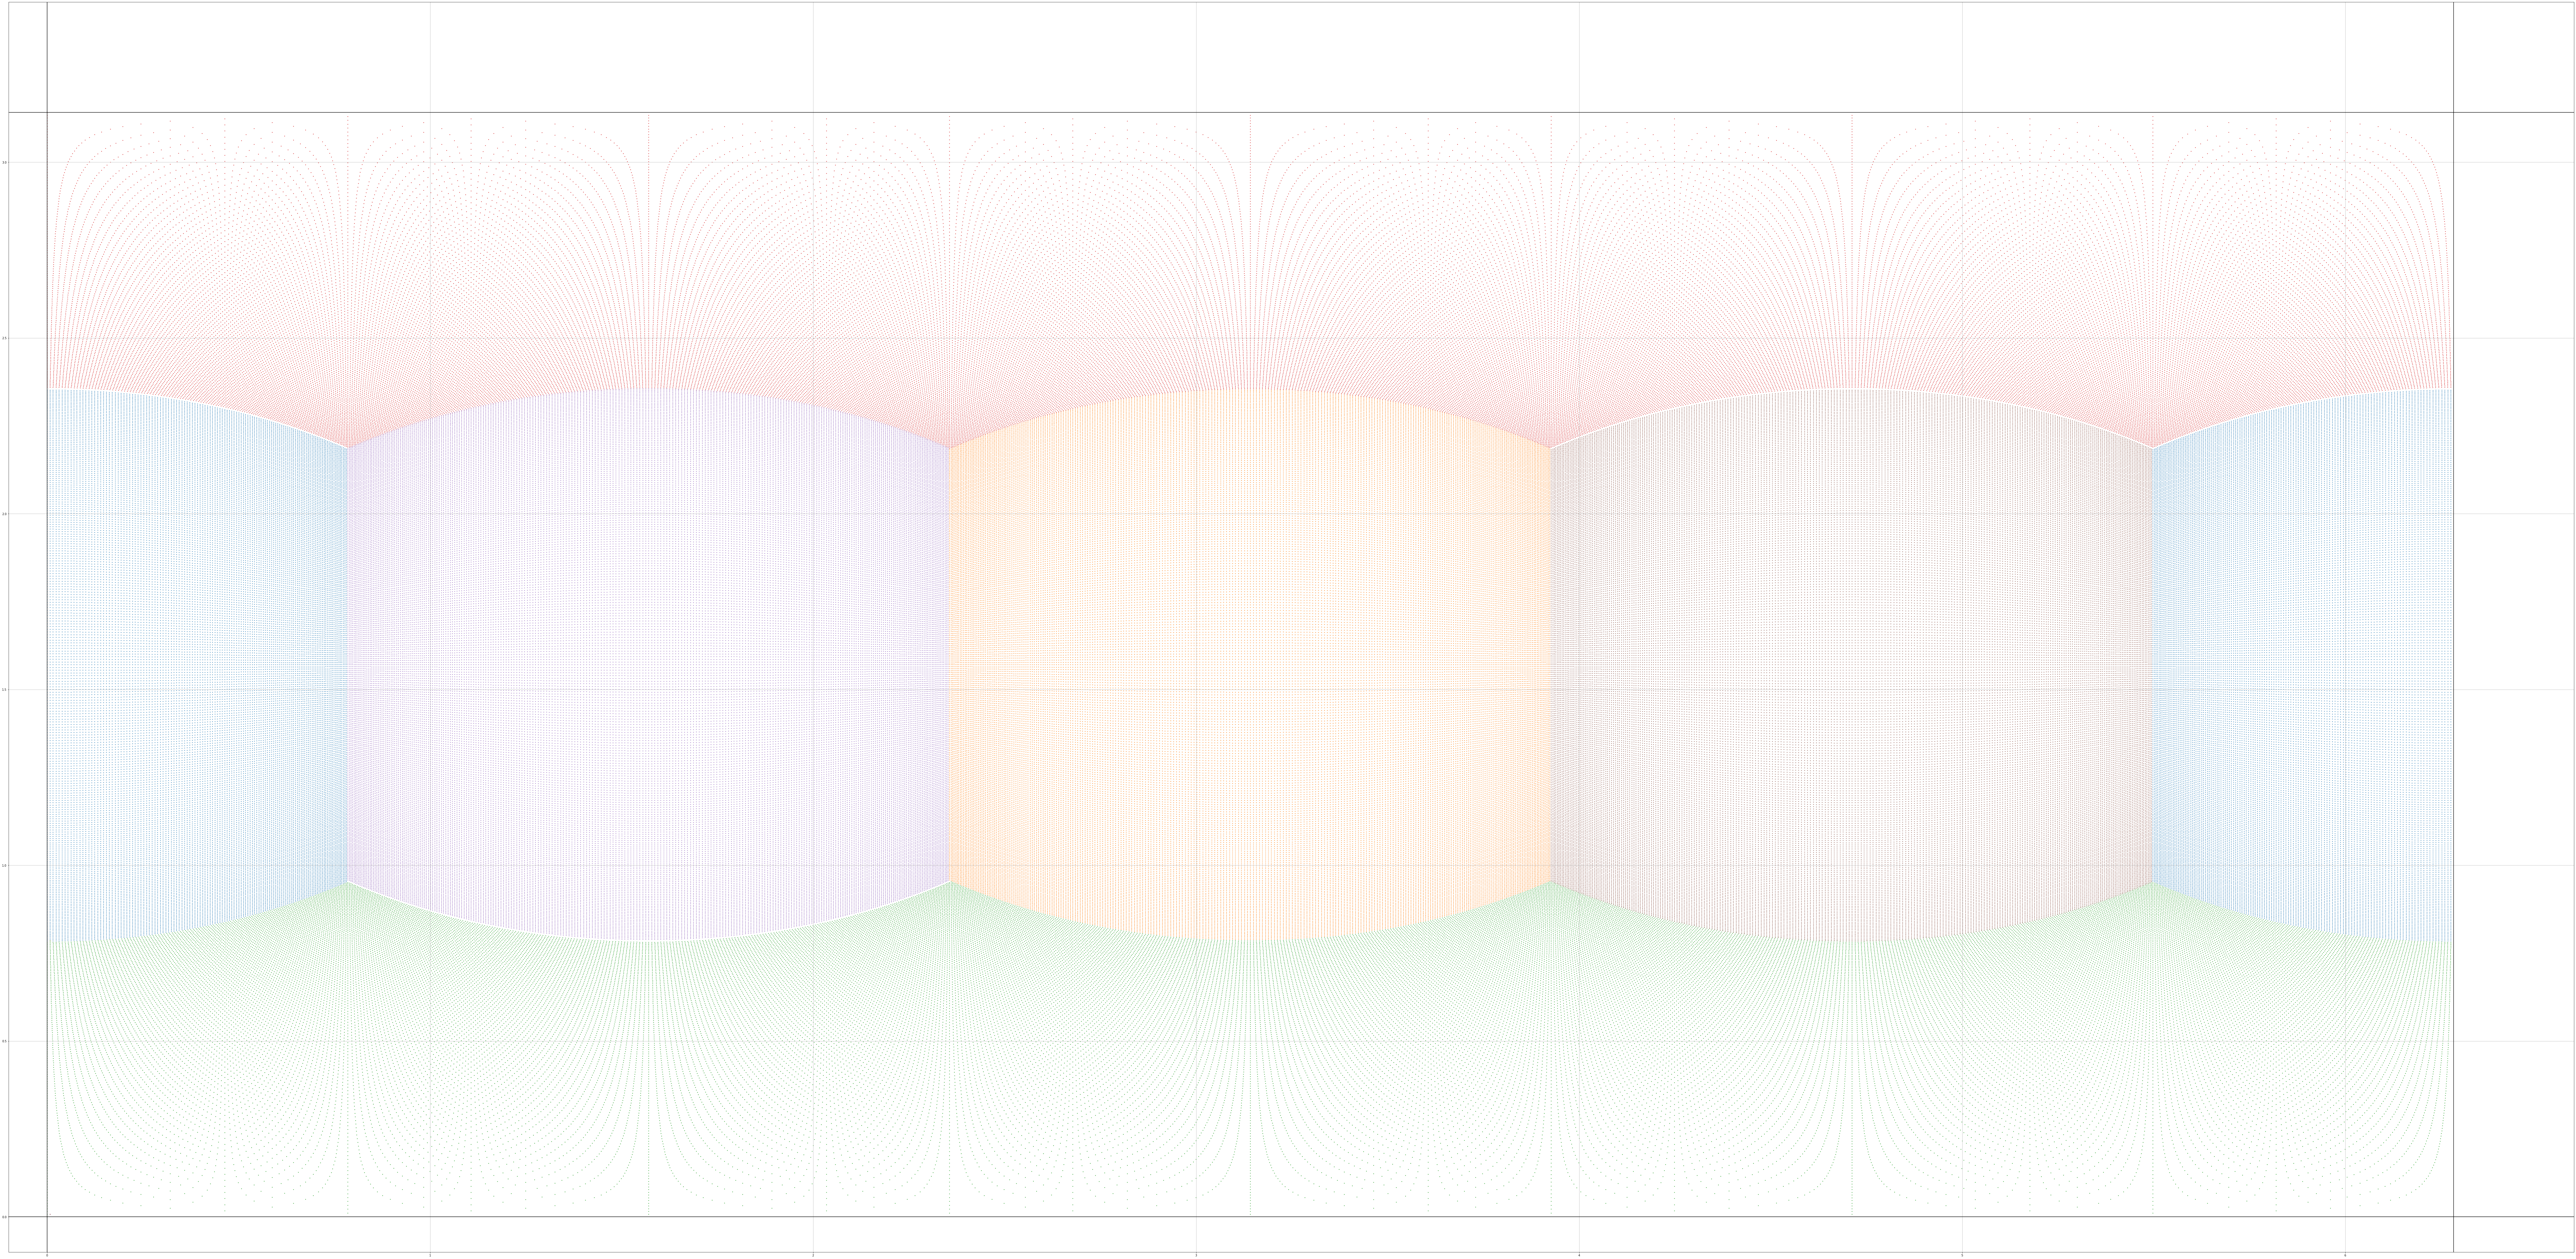

In [3]:
fig, ax = plt.subplots(figsize=(160, 80))

for face in range(0, 6):
    res = np.empty([1, 2])
    for x in range(0, 256):
        for y in range(0, 256):
            uv = np.array([x / 256.0 * 2.0 - 1.0, y / 256.0 * 2.0 - 1.0])
            uv_src = cubemap_to_cartesian(uv, face)
            #uv_src = np.array([uv_src[0] / (2.0 * math.pi), (uv_src[1] + math.pi / 2.0) / math.pi])

            res = np.append(res, [uv_src], axis=0)
            
    ax.scatter(res[:,0], res[:,1], 2.0)

ax.grid(True, which='both')
ax.axhline(y=math.pi, color= 'k')
ax.axhline(y=0, color= 'k')

ax.axvline(x=0, color='k')
ax.axvline(x=2*math.pi, color='k')

plt.xlim([-0.1, 2.1*math.pi])
plt.ylim([-0.1, 1.1*math.pi])
plt.show()

In [4]:
math.acos(-1)

3.141592653589793

(0.0, 1.0)

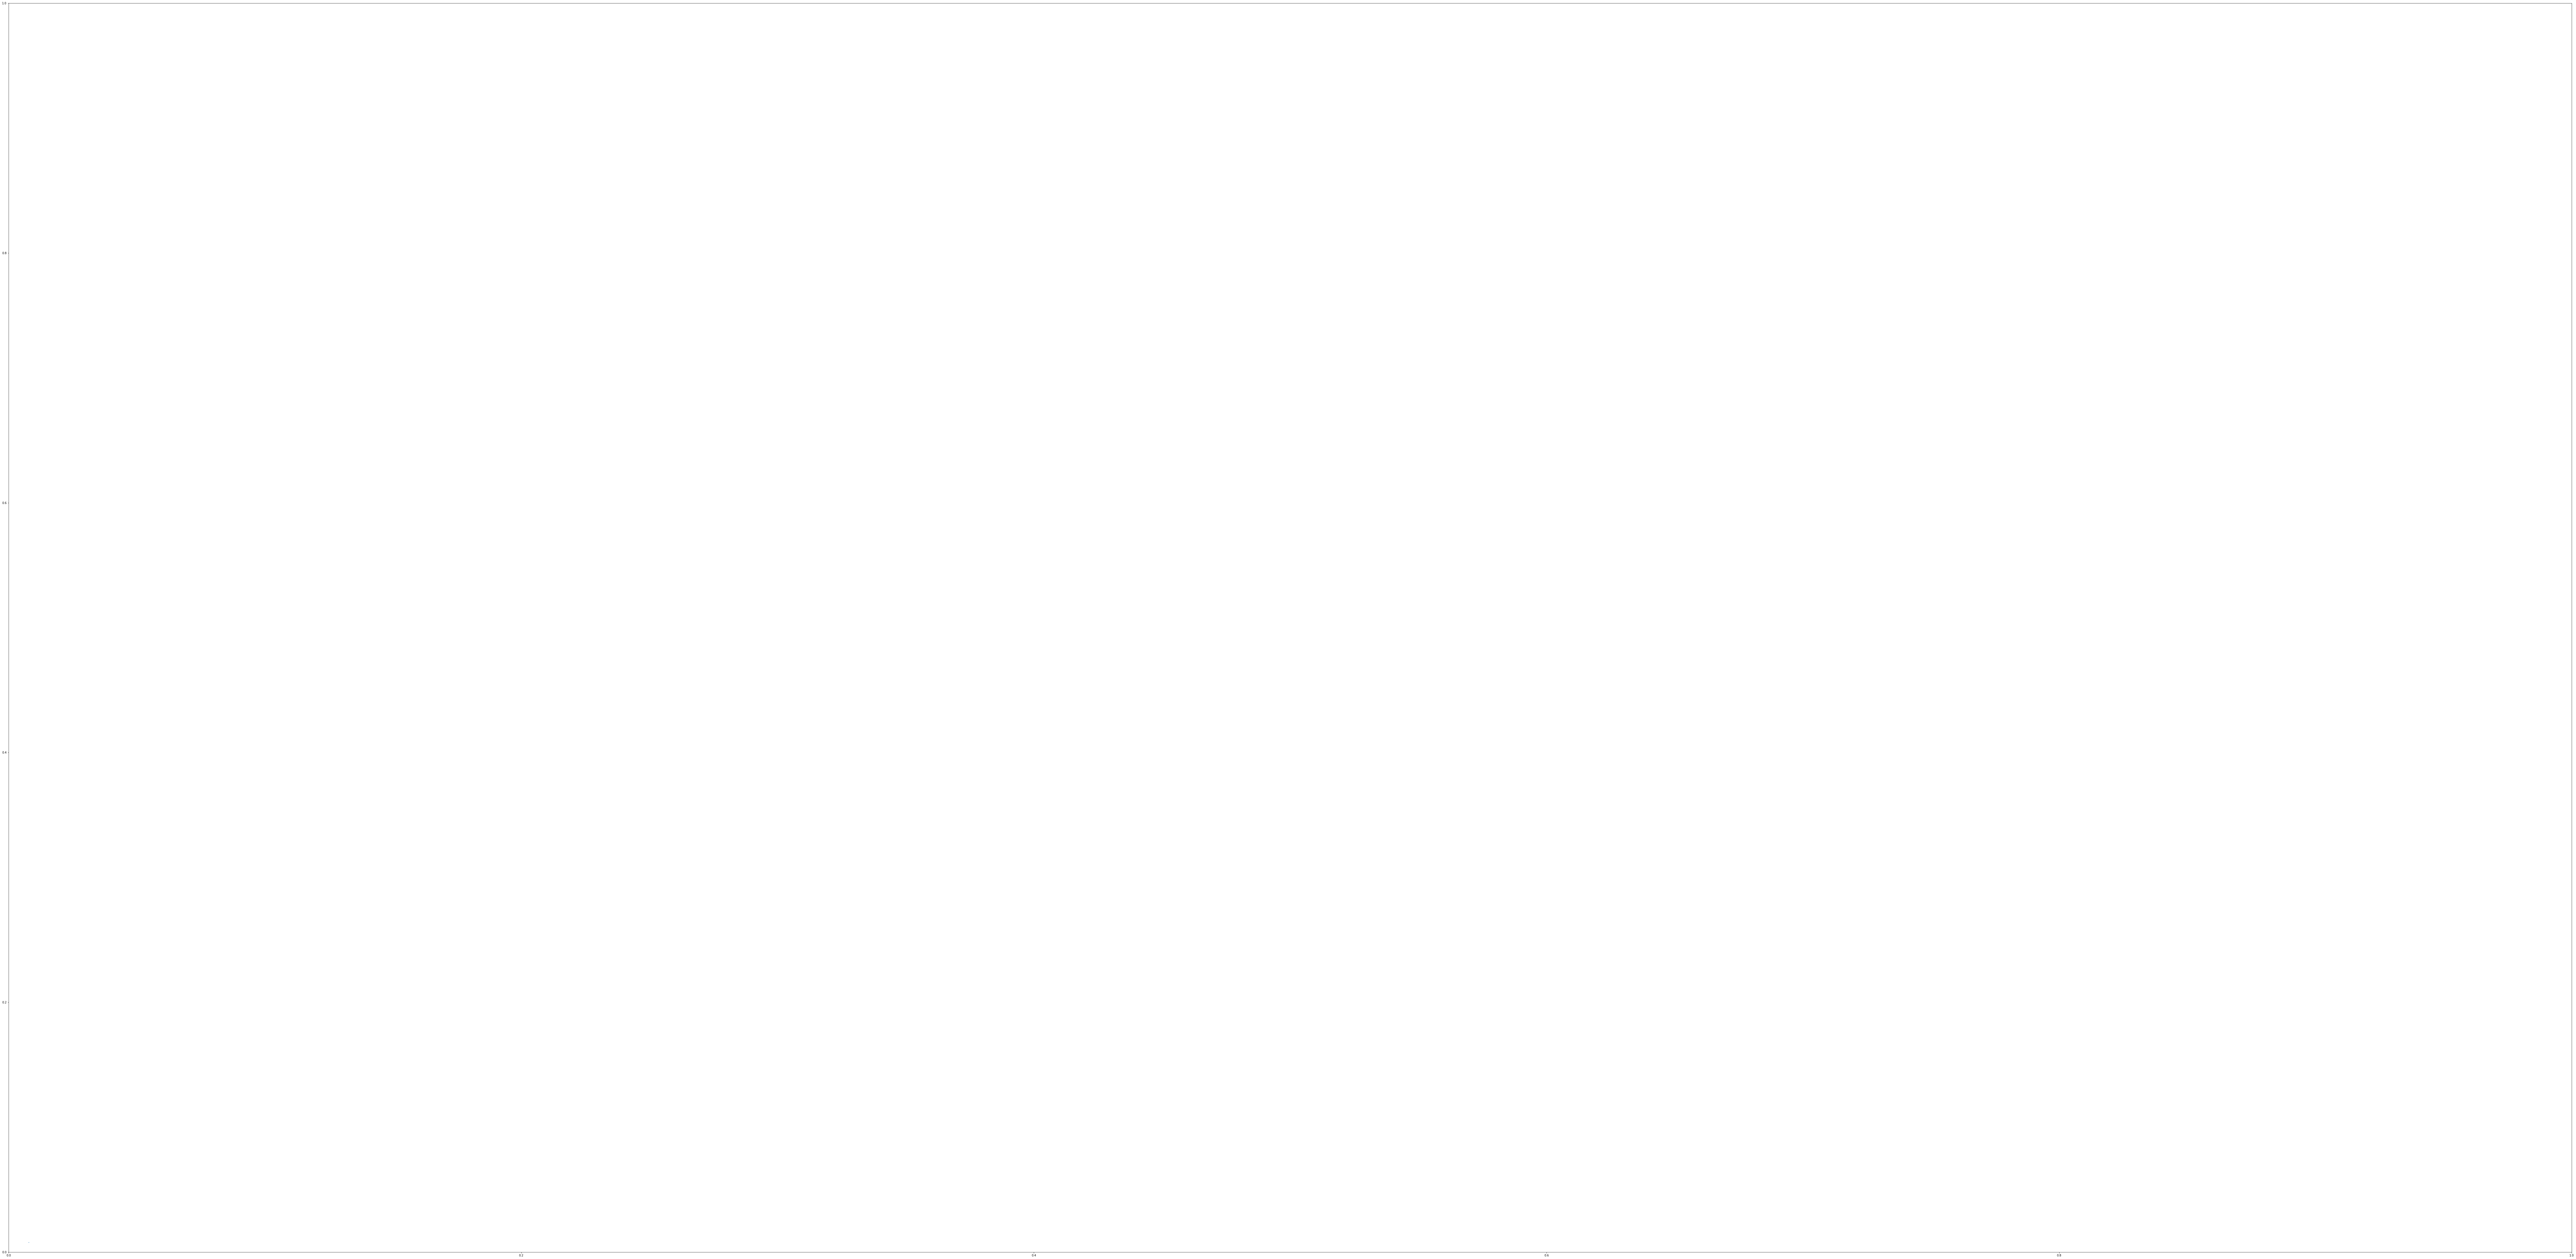

In [5]:
fig, ax = plt.subplots(figsize=(160, 80))

ax.scatter(res[:,0], res[:,1], 1.0)

plt.xlim([0, 1])
plt.ylim([0, 1])